# Explore model results

Load the data using [MIKE IO](https://dhi.github.io/mikeio) and review it. Data is stored as a dfsu file. Specific points are stored in a dfs0 file. 

### Load packages

In [38]:
import mikeio
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 10})

### Define paths

In [ ]:
#mr_fldr = "../output_sample/"
mr_fldr = "../output/" # Change the output folder if needed  
fig_fldr = "../figures/"
save_fig = True
show_fig = True

## Open the model result file

In [50]:
dfs = mikeio.open(f"{mr_fldr}Area.dfsu")
dfs

<mikeio.Dfsu2DH>
number of elements: 8058
number of nodes: 4237
projection: LONG/LAT
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Wave Period, T02 <Wave period> (second)
  3:  Mean Wave Direction <Mean Wave Direction> (degree)
time: 2022-01-03 00:00:00 - 2022-01-09 23:30:00 (336 records)

## Mesh and bathymetry

In [51]:
geom = dfs.geometry

Calculate the total area covered (in km^2)

In [52]:
geom.get_element_area().sum()/(10**6)

np.float64(236124.18653026468)

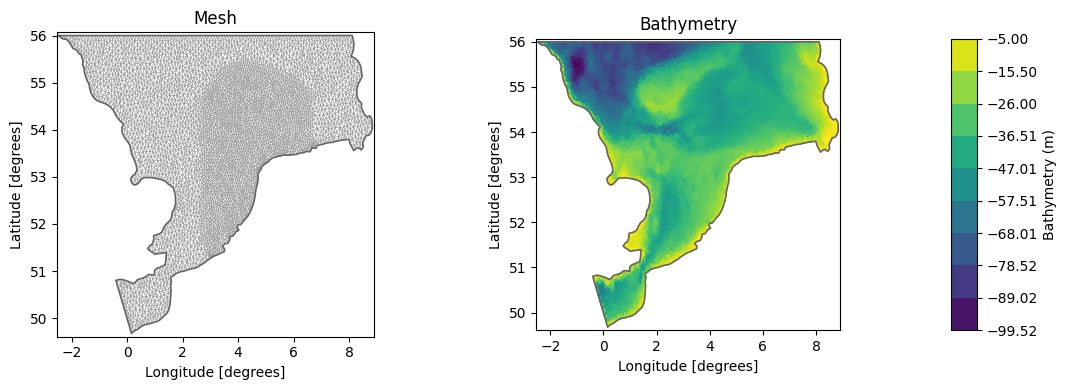

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(11.5, 4))
geom.plot.mesh(ax=axs[0])
geom.plot(ax=axs[1])
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}geometry.png")
plt.show()

## Area plots

Read data from file but exclude first two days (spin-up).

In [54]:
ds = dfs.read(time = slice("2022-01-03", "2023-12-31"))
ds

<mikeio.Dataset>
dims: (time:336, element:8058)
time: 2022-01-03 00:00:00 - 2022-01-09 23:30:00 (336 records)
geometry: Dfsu2D (8058 elements, 4237 nodes)
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Wave Period, T02 <Wave period> (second)
  3:  Mean Wave Direction <Mean Wave Direction> (degree)

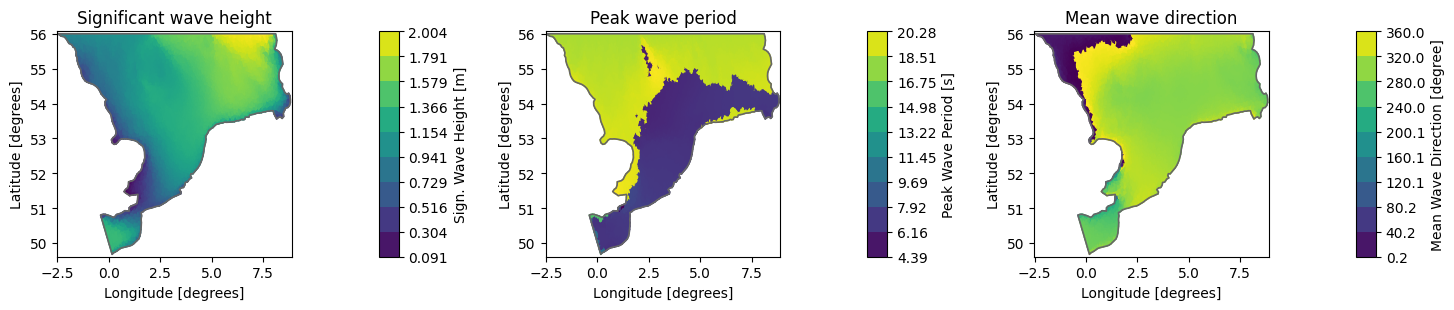

In [55]:
# Select time step and plot items
plot_time = "2022-05-01" if "2022-05-01" in ds.time else ds.time[-1]
fig,axs = plt.subplots(1, 3, figsize=(15, 5))
ds["Sign. Wave Height"].sel(time=plot_time).plot(ax=axs[0], title="Significant wave height")
ds["Peak Wave Period"].sel(time=plot_time).plot(ax=axs[1], title="Peak wave period")
ds["Mean Wave Direction"].sel(time=plot_time).plot(ax=axs[2], title="Mean wave direction")
plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{plot_time}.png")
if show_fig:
    plt.show()

In [56]:
da = ds["Mean Wave Direction"].isel(element=-1)
da

<mikeio.DataArray>
name: Mean Wave Direction
dims: (time:336)
time: 2022-01-03 00:00:00 - 2022-01-09 23:30:00 (336 records)
geometry: GeometryPoint2D(x=5.945873333333334, y=54.415439666666664)
values: [248.7, 249.4, ..., 295.3]

## Timeseries

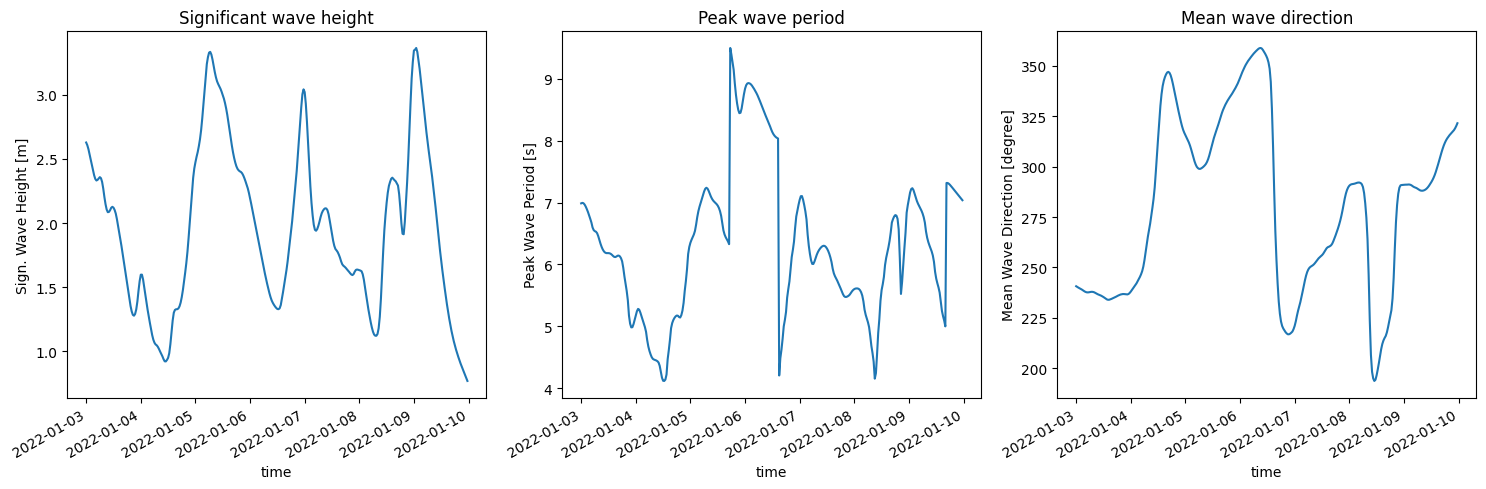

In [57]:
# Select spatial point and plot items
p = (2.5, 51.5)
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Sign. Wave Height"].sel(x=p[0], y=p[1]).plot(ax=axs[0], title="Significant wave height")
ds["Peak Wave Period"].sel(x=p[0], y=p[1]).plot(ax=axs[1], title="Peak wave period")
ds["Mean Wave Direction"].sel(x=p[0], y=p[1]).plot(ax=axs[2], title="Mean wave direction")
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{p[0]}E_{p[1]}N.png")
if show_fig:
    plt.show()

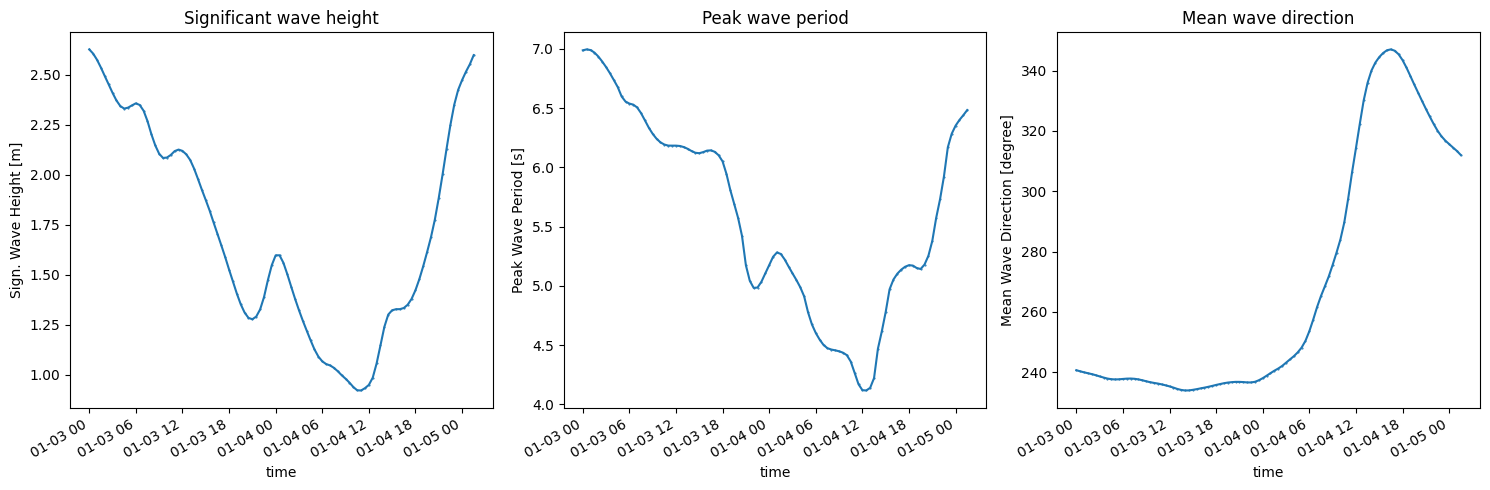

In [58]:
# Zoom in on a time interval
time_interval=slice("2022-05-01","2022-05-14") if "2022-05-01" in ds.time else ds.time[:100]
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Sign. Wave Height"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[0], marker = 'o', markersize=0.5, title="Significant wave height")
ds["Peak Wave Period"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[1], marker = 'o', markersize=0.5, title="Peak wave period")
ds["Mean Wave Direction"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[2], marker = 'o', markersize=0.5, title="Mean wave direction")
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{p[0]}E_{p[1]}N_zoom.png")
if show_fig:
    plt.show()


You can go to the model_validation_*.ipynb files to see how the model results are compared to observations.